In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [113]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [114]:
merged_Data = pd.merge(client_df,price_df,on ='id')

In [115]:
merged_Data.shape

(175149, 33)

In [116]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [117]:
client_df.replace('MISSING', np.nan, inplace=True) #values in the column channel_Sales MISSING might be the possile missing values 


In [118]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [119]:
client_df.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [120]:
price_df.dtypes

id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object

In [121]:
#convert the dates to date time format from both the dataframes

In [122]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'])


In [123]:
columns_to_convert = ['date_activ', 'date_end', 'date_modif_prod','date_renewal']


In [124]:
client_df[columns_to_convert] = client_df[columns_to_convert].apply(pd.to_datetime)


In [125]:
#converted the date columns to datetime datatype

In [126]:
client_df.describe()


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [127]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [128]:
#Visualize the distributions of numerical variables using histograms

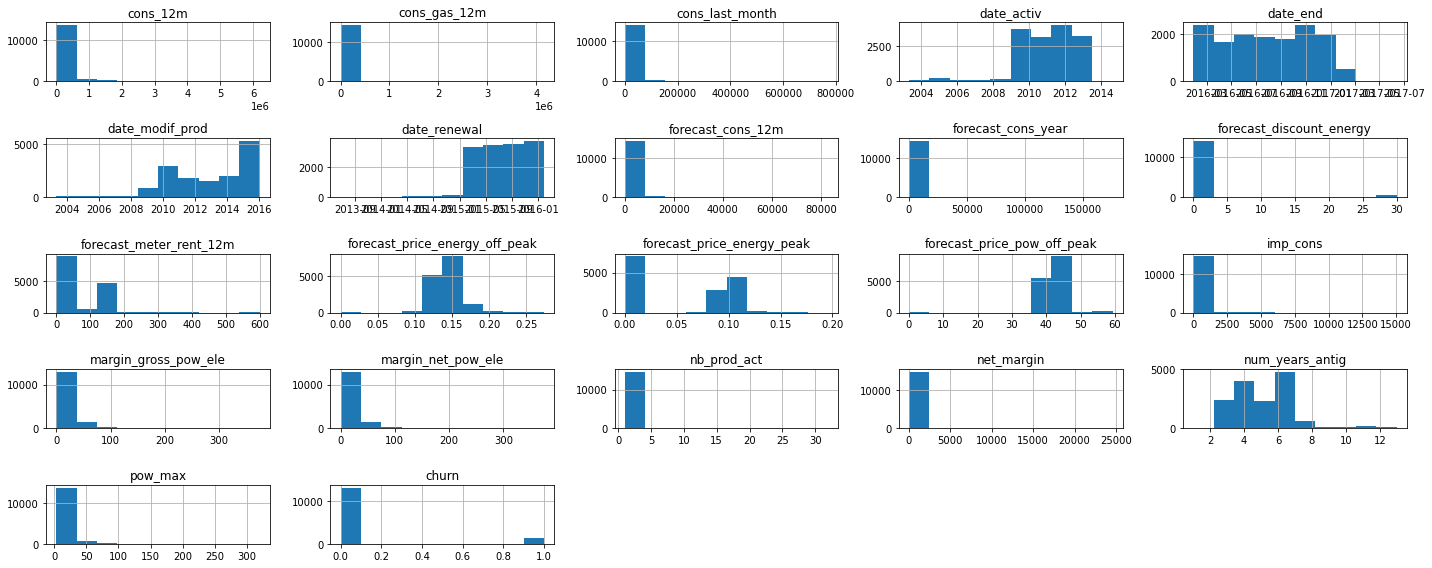

In [129]:
client_df.hist(figsize=(20, 8))
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

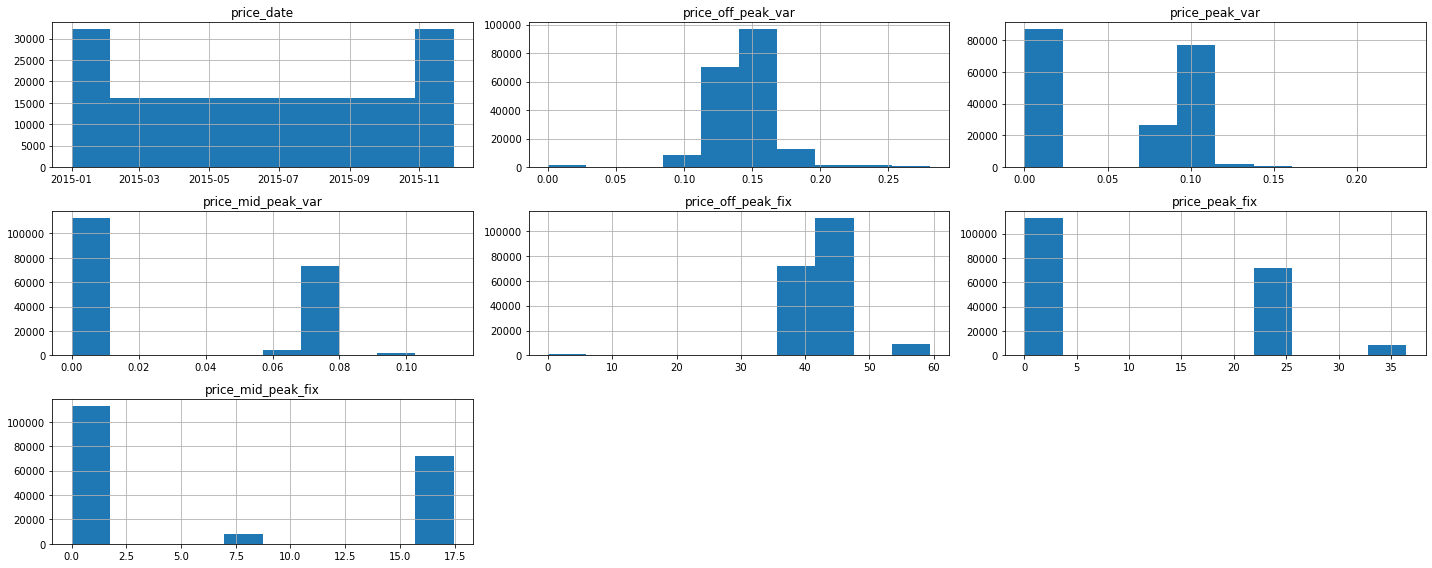

In [130]:
price_df.hist(figsize=(20, 8))
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

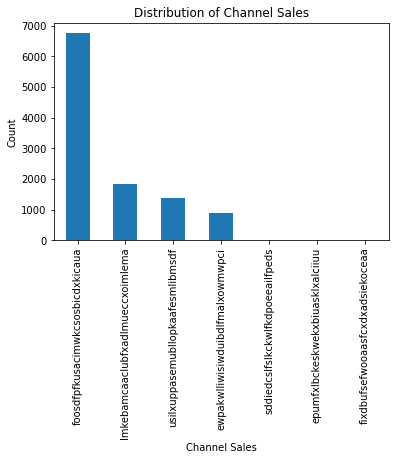

In [131]:
client_df['channel_sales'].value_counts().plot(kind='bar')
plt.xlabel('Channel Sales')
plt.ylabel('Count')
plt.title('Distribution of Channel Sales')
plt.show()

defining price sensitivity as the difference between the current price and the average historical price for each customer. The assumption is that customers who experience larger price increases or have higher prices compared to the historical average might be more sensitive to price changes and thus more likely to churn.

In [132]:
#Calculate the average historical price for each customer:


In [133]:
avg_price = price_df.groupby('id').mean().reset_index()


In [134]:
avg_price

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [135]:
merged_df = pd.merge(client_df, avg_price, on='id', how='left')
#Merge the average price with the client_df DataFrame:


In [136]:
merged_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,num_years_antig,origin_up,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000


In [137]:
avg_price = price_df.groupby('id').mean().reset_index()
merged_df = pd.merge(client_df, avg_price, on='id', how='left')
pricing_columns = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
for column in pricing_columns:
    merged_df[f'sensitivity_{column}'] = merged_df[column] - merged_df[column].mean()
    # Step 4: Check the correlation between price sensitivity and churn

sensitivity_columns = [f'sensitivity_{column}' for column in pricing_columns]
correlation = merged_df[sensitivity_columns + ['churn']].corr()


In [138]:
correlation

,sensitivity_price_off_peak_var,sensitivity_price_peak_var,sensitivity_price_mid_peak_var,sensitivity_price_off_peak_fix,sensitivity_price_peak_fix,sensitivity_price_mid_peak_fix,churn
sensitivity_price_off_peak_var,1.000000,-0.317882,-0.609086,0.662064,-0.631643,-0.609196,-0.006421
sensitivity_price_peak_var,-0.317882,1.000000,0.822436,-0.211414,0.810653,0.815675,0.029588
sensitivity_price_mid_peak_var,-0.609086,0.822436,1.000000,-0.288083,0.987691,0.991544,0.046544
sensitivity_price_off_peak_fix,0.662064,-0.211414,-0.288083,1.000000,-0.228613,-0.332563,0.016800
sensitivity_price_peak_fix,-0.631643,0.810653,0.987691,-0.228613,1.000000,0.974096,0.047240
sensitivity_price_mid_peak_fix,-0.609196,0.815675,0.991544,-0.332563,0.974096,1.000000,0.044842
churn,-0.006421,0.029588,0.046544,0.016800,0.047240,0.044842,1.000000


From the correlation matrix, we can observe the correlation coefficients between price sensitivity variables and churn. However, it is important to note that the correlation coefficients are relatively low, indicating a weak linear relationship between price sensitivity and churn.
From the correlation matrix, we can observe the correlation coefficients between price sensitivity variables and churn. However, it is important to note that the correlation coefficients are relatively low, indicating a weak linear relationship between price sensitivity and churn.
correlation does not necessarily imply causation, and other factors not considered in this analysis might play a more significant role in predicting churn.

In [139]:
merged_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
       'sensitivity_price_off_peak_var', 'sensitivity_price_peak_var',
       'sensitivity_price_mid_peak_var', 'sensitivity_price_off_peak_fix',
       'sensitivity_price_peak_fix', 'sensitivity_price_mid_peak_fix'],
      dtype='object')

In [140]:
merged_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,sensitivity_price_off_peak_var,sensitivity_price_peak_var,sensitivity_price_mid_peak_var,sensitivity_price_off_peak_fix,sensitivity_price_peak_fix,sensitivity_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.066530,40.942265,22.352010,14.901340,-0.017540,0.048686,0.038255,-1.986624,12.891136,8.803660
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.311375,0.000000,0.000000,0.007282,-0.044940,-0.028276,1.382485,-9.460874,-6.097680
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.385450,0.000000,0.000000,0.028184,0.036358,-0.028276,1.456560,-9.460874,-6.097680
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.400265,0.000000,0.000000,0.008883,-0.052063,-0.028276,1.471375,-9.460874,-6.097680
4,149d57cf92fc41cf94415803a877cb4b,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.072865,40.688156,24.412893,16.275263,-0.018153,0.051575,0.044590,-2.240734,14.952019,10.177583


In [141]:
merged_df.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [142]:
price_df = pd.read_csv('price_data.csv')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [143]:
merged_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,sensitivity_price_off_peak_var,sensitivity_price_peak_var,sensitivity_price_mid_peak_var,sensitivity_price_off_peak_fix,sensitivity_price_peak_fix,sensitivity_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.066530,40.942265,22.352010,14.901340,-0.017540,0.048686,0.038255,-1.986624,12.891136,8.803660
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.311375,0.000000,0.000000,0.007282,-0.044940,-0.028276,1.382485,-9.460874,-6.097680
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.385450,0.000000,0.000000,0.028184,0.036358,-0.028276,1.456560,-9.460874,-6.097680
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.400265,0.000000,0.000000,0.008883,-0.052063,-0.028276,1.471375,-9.460874,-6.097680
4,149d57cf92fc41cf94415803a877cb4b,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.072865,40.688156,24.412893,16.275263,-0.018153,0.051575,0.044590,-2.240734,14.952019,10.177583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,44.370635,0.000000,0.000000,0.001797,-0.052063,-0.028276,1.441745,-9.460874,-6.097680
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.070817,59.015674,36.393379,8.345418,-0.035528,0.043343,0.042541,16.086784,26.932505,2.247738
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.073160,40.701732,24.421038,16.280694,-0.017989,0.051731,0.044885,-2.227158,14.960165,10.183014
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,44.311375,0.000000,0.000000,0.007282,-0.044940,-0.028276,1.382485,-9.460874,-6.097680


In [144]:
merged_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
       'sensitivity_price_off_peak_var', 'sensitivity_price_peak_var',
       'sensitivity_price_mid_peak_var', 'sensitivity_price_off_peak_fix',
       'sensitivity_price_peak_fix', 'sensitivity_price_mid_peak_fix'],
      dtype='object')

# TASK3

In [146]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [145]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [148]:
# Feature Engineering
merged_df['offpeak_diff_dec_january_energy'] = diff['offpeak_diff_dec_january_energy']
merged_df['offpeak_diff_dec_january_power'] = diff['offpeak_diff_dec_january_power']


In [150]:
merged_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_peak_fix,price_mid_peak_fix,sensitivity_price_off_peak_var,sensitivity_price_peak_var,sensitivity_price_mid_peak_var,sensitivity_price_off_peak_fix,sensitivity_price_peak_fix,sensitivity_price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,22.352010,14.901340,-0.017540,0.048686,0.038255,-1.986624,12.891136,8.803660,-0.006192,0.162916
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.000000,0.007282,-0.044940,-0.028276,1.382485,-9.460874,-6.097680,-0.004104,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000000,0.028184,0.036358,-0.028276,1.456560,-9.460874,-6.097680,0.050443,1.500000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000000,0.008883,-0.052063,-0.028276,1.471375,-9.460874,-6.097680,-0.010018,0.162916
4,149d57cf92fc41cf94415803a877cb4b,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,24.412893,16.275263,-0.018153,0.051575,0.044590,-2.240734,14.952019,10.177583,-0.003994,-0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,0.000000,0.001797,-0.052063,-0.028276,1.441745,-9.460874,-6.097680,-0.011518,0.829583
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,36.393379,8.345418,-0.035528,0.043343,0.042541,16.086784,26.932505,2.247738,-0.006192,0.162916
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,24.421038,16.280694,-0.017989,0.051731,0.044885,-2.227158,14.960165,10.183014,-0.045420,0.177779
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,0.000000,0.007282,-0.044940,-0.028276,1.382485,-9.460874,-6.097680,-0.006192,0.162916


In [151]:
merged_df['customer_tenure'] = pd.to_datetime(merged_df['date_end']) - pd.to_datetime(merged_df['date_activ'])
merged_df['customer_tenure'] = merged_df['customer_tenure'].dt.days
merged_df['gas_consumption_ratio'] = merged_df['cons_gas_12m'] / merged_df['cons_12m'] 

In [152]:
merged_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,sensitivity_price_off_peak_var,sensitivity_price_peak_var,sensitivity_price_mid_peak_var,sensitivity_price_off_peak_fix,sensitivity_price_peak_fix,sensitivity_price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,customer_tenure,gas_consumption_ratio
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,-0.017540,0.048686,0.038255,-1.986624,12.891136,8.803660,-0.006192,0.162916,1096,inf
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.007282,-0.044940,-0.028276,1.382485,-9.460874,-6.097680,-0.004104,0.177779,2566,0.00000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.028184,0.036358,-0.028276,1.456560,-9.460874,-6.097680,0.050443,1.500000,2192,0.00000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.008883,-0.052063,-0.028276,1.471375,-9.460874,-6.097680,-0.010018,0.162916,2192,0.00000
4,149d57cf92fc41cf94415803a877cb4b,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,-0.018153,0.051575,0.044590,-2.240734,14.952019,10.177583,-0.003994,-0.000001,2245,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.001797,-0.052063,-0.028276,1.441745,-9.460874,-6.097680,-0.011518,0.829583,1445,1.48559
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,-0.035528,0.043343,0.042541,16.086784,26.932505,2.247738,-0.006192,0.162916,1461,0.00000
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,-0.017989,0.051731,0.044885,-2.227158,14.960165,10.183014,-0.045420,0.177779,1460,0.00000
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.007282,-0.044940,-0.028276,1.382485,-9.460874,-6.097680,-0.006192,0.162916,1461,0.00000


In [153]:
merged_df.dtypes

id                                         object
channel_sales                              object
cons_12m                                    int64
cons_gas_12m                                int64
cons_last_month                             int64
date_activ                         datetime64[ns]
date_end                           datetime64[ns]
date_modif_prod                    datetime64[ns]
date_renewal                       datetime64[ns]
forecast_cons_12m                         float64
forecast_cons_year                          int64
forecast_discount_energy                  float64
forecast_meter_rent_12m                   float64
forecast_price_energy_off_peak            float64
forecast_price_energy_peak                float64
forecast_price_pow_off_peak               float64
has_gas                                    object
imp_cons                                  float64
margin_gross_pow_ele                      float64
margin_net_pow_ele                        float64


In [162]:
merged_df.isna().sum()

id                                 0
channel_sales                      0
cons_12m                           0
cons_gas_12m                       0
cons_last_month                    0
date_activ                         0
date_end                           0
date_modif_prod                    0
date_renewal                       0
forecast_cons_12m                  0
forecast_cons_year                 0
forecast_discount_energy           0
forecast_meter_rent_12m            0
forecast_price_energy_off_peak     0
forecast_price_energy_peak         0
forecast_price_pow_off_peak        0
has_gas                            0
imp_cons                           0
margin_gross_pow_ele               0
margin_net_pow_ele                 0
nb_prod_act                        0
net_margin                         0
num_years_antig                    0
origin_up                          0
pow_max                            0
churn                              0
price_off_peak_var                 0
p

In [163]:
merged_df = merged_df.dropna()

In [169]:
merged_df = merged_df.replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN
merged_df = merged_df.dropna(subset=feature_cols)

In [170]:
# Define feature columns and target variable
feature_cols = ['offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power', 'customer_tenure', 'forecast_cons_12m', 'nb_prod_act', 'gas_consumption_ratio']
target_col = 'churn'

In [171]:
X_train, X_test, y_train, y_test = train_test_split(merged_df[feature_cols], merged_df[target_col], test_size=0.2, random_state=42)

In [172]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [173]:
y_pred = clf.predict(X_test)


In [175]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Model Performance:
Accuracy: 0.8821892393320965
Precision: 0.16
Recall: 0.016877637130801686
F1-score: 0.030534351145038167


#model achieved an accuracy of approximately 88.22%, indicating that around 88.22% of the predictions made by the model were correct.
These performance metrics suggest that the model may be struggling to effectively predict the positive class (churn) accurately. It's possible that the model needs further refinement or the data itself may require additional preprocessing or feature engineering to improve the model's performance.